In [27]:
#Importing Required Libraries
from qiskit import *
from qiskit.tools.visualization import *
import numpy as np
from qiskit.circuit.library import *
qr=QuantumRegister(5,name='q')
aq=QuantumRegister(2,name='a')
cr=ClassicalRegister(5)

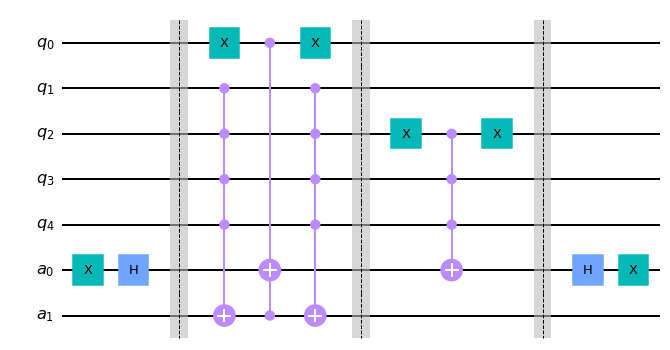

In [55]:
#Designing Oracle
Oracle=QuantumCircuit(qr,aq)
#for i in range(5): Oracle.h(i) #NotPartOfOracle
Oracle.x(5)
Oracle.h(5)
Oracle.barrier()

Oracle.x(0)

#Below is my attempt at constructing a C5X Gate.
Oracle.append(C4XGate(),[1,2,3,4,6])
Oracle.append(CCXGate(),[0,6,5])
Oracle.append(C4XGate(),[1,2,3,4,6])

Oracle.x(0)

Oracle.barrier()

Oracle.x(2)
Oracle.append(C3XGate(),[2,3,4,5])
Oracle.x(2)

Oracle.barrier()

Oracle.h(5)
Oracle.x(5)

Oracle.draw('mpl')

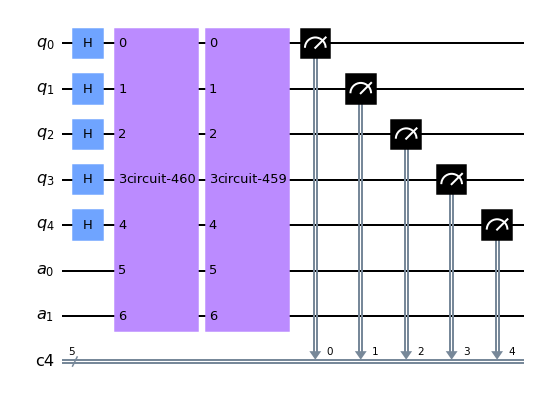

In [58]:
GCircuit=QuantumCircuit(qr,aq,cr)
for i in range(5): GCircuit.h(i)
GCircuit.append(Oracle,[0,1,2,3,4,5,6])
GCircuit.append(Diff,[0,1,2,3,4,5,6])
for i in range(5): GCircuit.measure(i,cr[i])

GCircuit.draw('mpl')

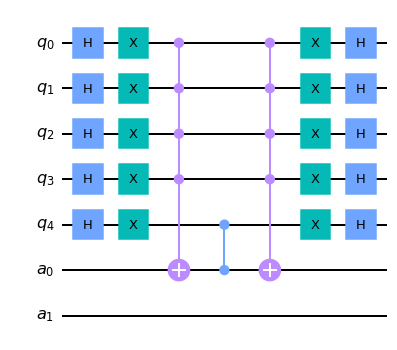

In [54]:
Diff=QuantumCircuit(qr,aq)
for i in range(5): 
    Diff.h(i)
    Diff.x(i)
Diff.append(C4XGate(),[0,1,2,3,5])
Diff.cz(5,4)
Diff.append(C4XGate(),[0,1,2,3,5])
for i in range(5): 
    Diff.x(i)
    Diff.h(i)
Diff.draw('mpl')

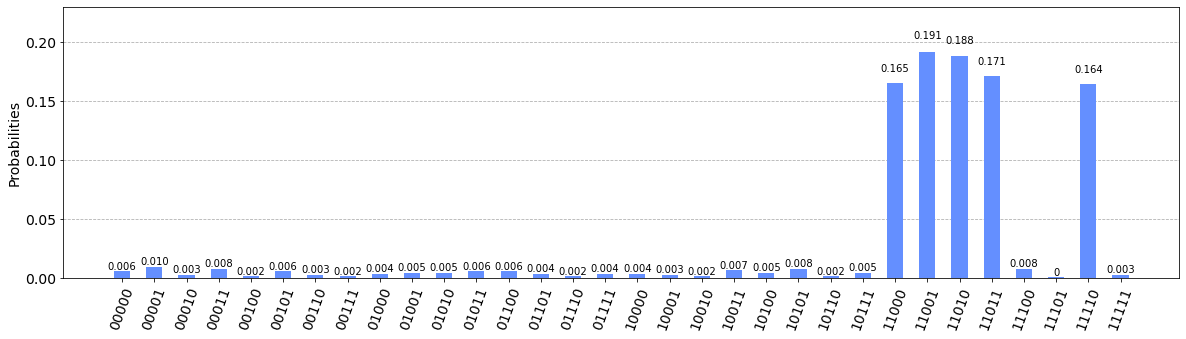

In [61]:
simulator=Aer.get_backend('qasm_simulator')
RES=execute(GCircuit,backend=simulator).result()
plot_histogram(RES.get_counts(GCircuit),(20,5))